# Simple Linear Regression

Notebook makes use of linear regression to predict the price of a house based one variable (sqare feet).  
Uses mean squared error as cost function.  
Initializes weight and bias using numpy randn function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Initialize price and square feet arrays
price = np.array([150, 300, 175, 120, 500, 248, 350, 250, 450]) # Price per 1000
sqr_feet = np.array([1000, 1800, 1200, 1100, 2200, 2000, 1500, 1600, 2300])

Slope: 0.23869963369963373
y-intercept: -107.32051282051304


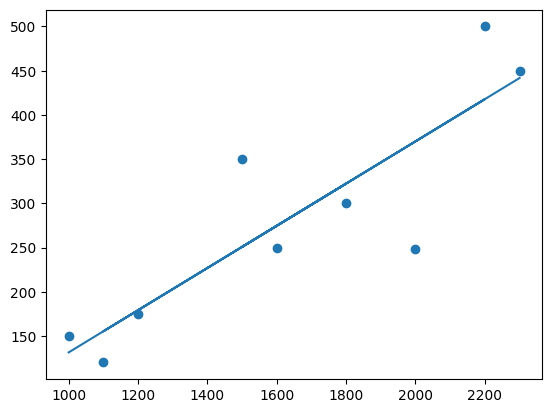

In [5]:
# Graph representation of prices at each square feet with best fit line
# Will compare this to generated graph after linear regression
a, b = np.polyfit(sqr_feet, price, 1)
print(f"Slope: {a}" + '\n' + f"y-intercept: {b}")

plt.scatter(sqr_feet, price)
plt.plot(sqr_feet, a*sqr_feet + b)
plt.show()

In [46]:
# Scale square feet and prices down using using feature scaling
price_scaled = np.array([i/np.max(price) for i in price])
sqrFeet_scaled = np.array([i/np.max(sqr_feet) for i in sqr_feet])
n = np.shape(price_scaled)[0]

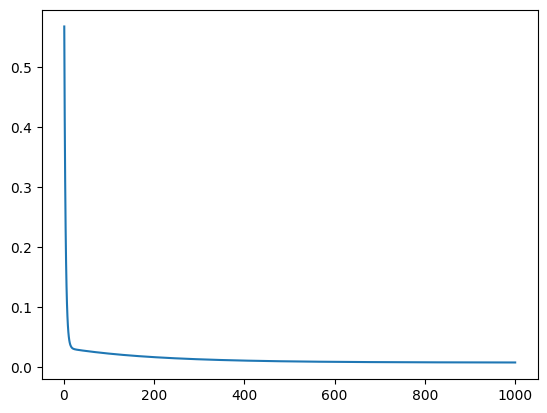

Final Cost 0.00777982277234834
Final Weight: 1.0072778015628965
Final Bias: -0.1485367035889094


In [82]:
# Initialize weight and bias
weight = np.random.randn()
bias = np.random.randn()

learning_rate = 0.1 # Used learning rate of 0.1
costs = []

for i in range(1000):
    # Calculate ouput using f = wx + b
    f = np.dot(weight, sqrFeet_scaled) + bias
    
    # Calculate cost at each step using mean sqared error
    cost = (1 / (2*n)) * np.sum((f - price_scaled)**2)
    costs.append(cost)

    # Calulate value of derivative of cost with respect to weights and biases
    delta_weight = (1 / n) * np.sum((f - price_scaled) * sqrFeet_scaled)
    delta_bias = (1 / n) * np.sum((f - price_scaled))

    # Change weights and biases simultaneously according to derivatives and learning rate
    weight = weight - learning_rate * delta_weight
    bias = bias - learning_rate * delta_bias
    
# Plot cost over per iteration
plt.plot(np.linspace(1,len(costs), len(costs)), costs)
plt.show()

print(f"Final Cost {min(costs)}")
print(f"Final Weight: {weight}")
print(f"Final Bias: {bias}")

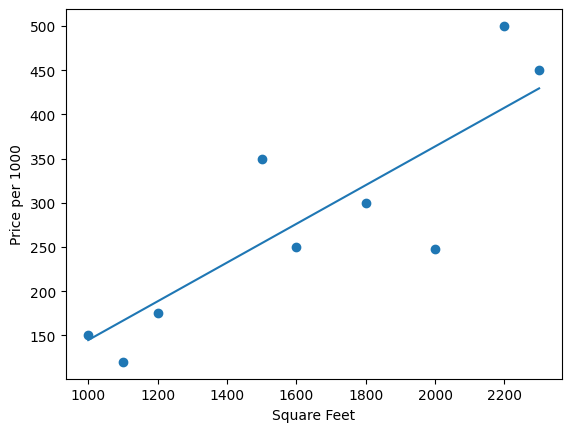

In [99]:
# Graph predicted values of price using linear regression
x = np.linspace(min(sqr_feet), max(sqr_feet), 100)

plt.xlabel("Square Feet")
plt.ylabel("Price per 1000")
plt.scatter(sqr_feet, price)
plt.plot(x, np.max(price)*(weight*(x/np.max(sqr_feet)) + bias))
plt.show()

In [97]:
# Get price of house based on any square feet
# Uses prediction made from linear regression model
def get_price(sqrFeet):
    scaled_price = weight*(sqrFeet/np.max(sqr_feet)) + bias
    return scaled_price * np.max(price)

get_price(1500)

254.19180088909854